In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('finalData.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.head()

,prop_type,price,beds,baths,source,city,sqft
0,townhome,101,2,3,mls,Staten Island,121.0
1,townhome,850,1,1,unit_rental,New York,179.0
2,single_family,900,1,2,mls,Corona,900.0
3,condo,900,4,1,unit_rental,New York,128.0
4,condo,925,4,2,unit_rental,New York,104.0


In [14]:
df.drop(df[df['sqft']<0].index,inplace=True)

In [16]:
df.reset_index(inplace=True)

# Exploratory Data Analysis

<Axes: >

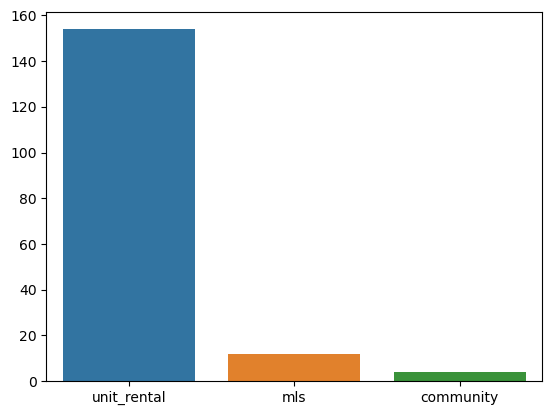

In [8]:
sns.barplot(x=df['source'].value_counts().index,y=df['source'].value_counts().values)

array([<Axes: ylabel='prop_type'>], dtype=object)

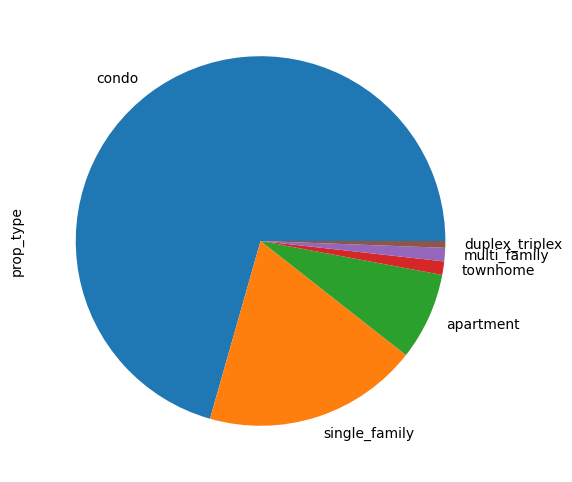

In [9]:
df['prop_type'].value_counts().plot.pie(subplots=True, figsize=(11, 6))

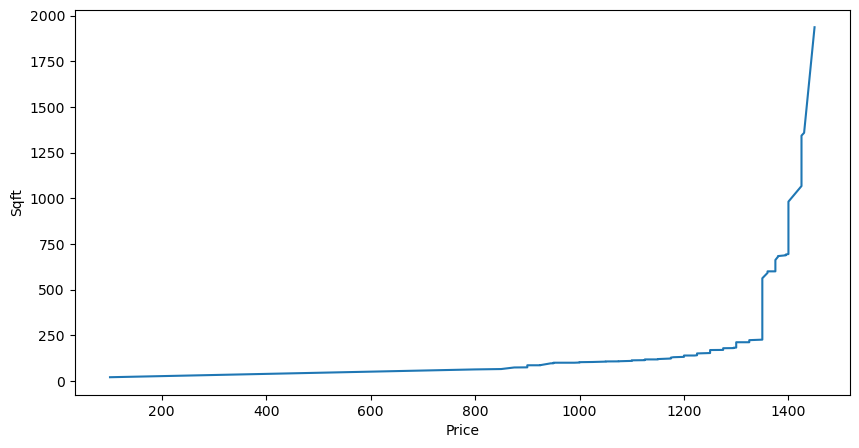

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
x = df['price'].sort_values()
y = df['sqft'].sort_values()
plt.ylabel('Sqft')
plt.xlabel('Price')
plt.plot(x,y)
plt.show()

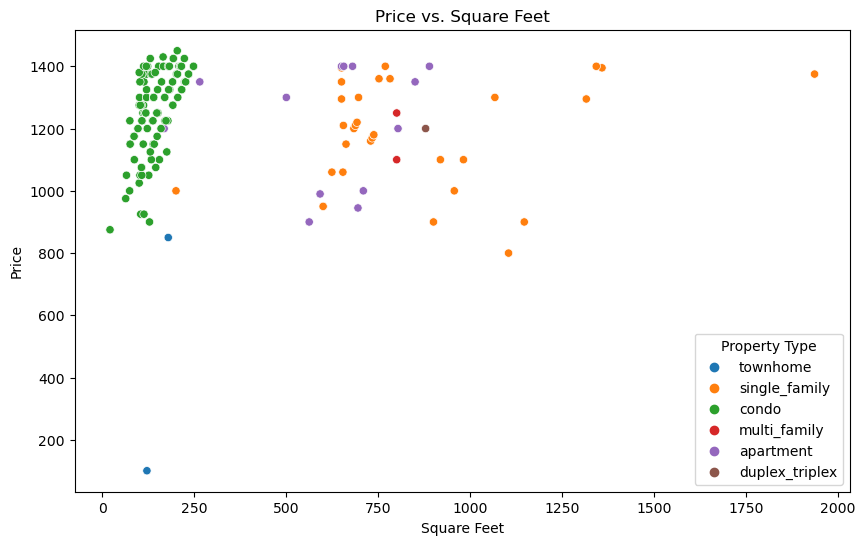

In [30]:
# Scatter plot of price vs. sqft
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft', y='price', hue='prop_type')
plt.title('Price vs. Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend(title='Property Type')
plt.show()

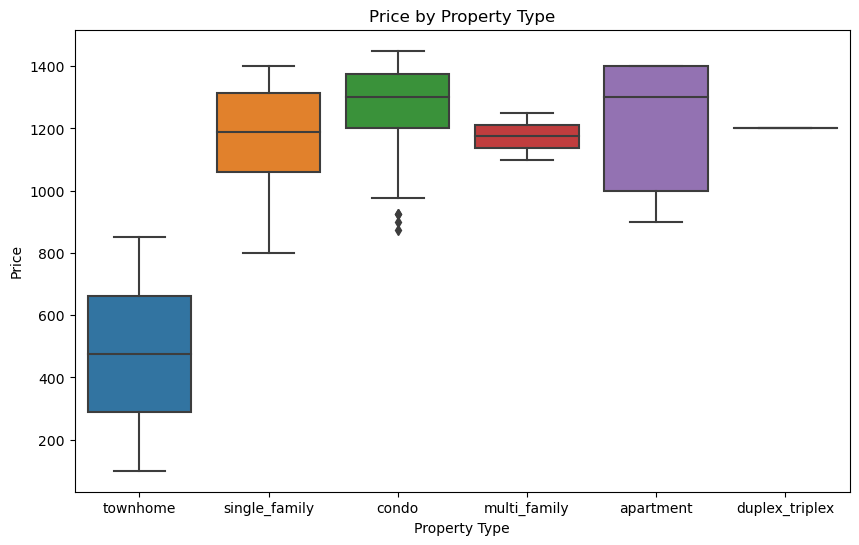

In [31]:
# Box plot of price by property type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='prop_type', y='price')
plt.title('Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

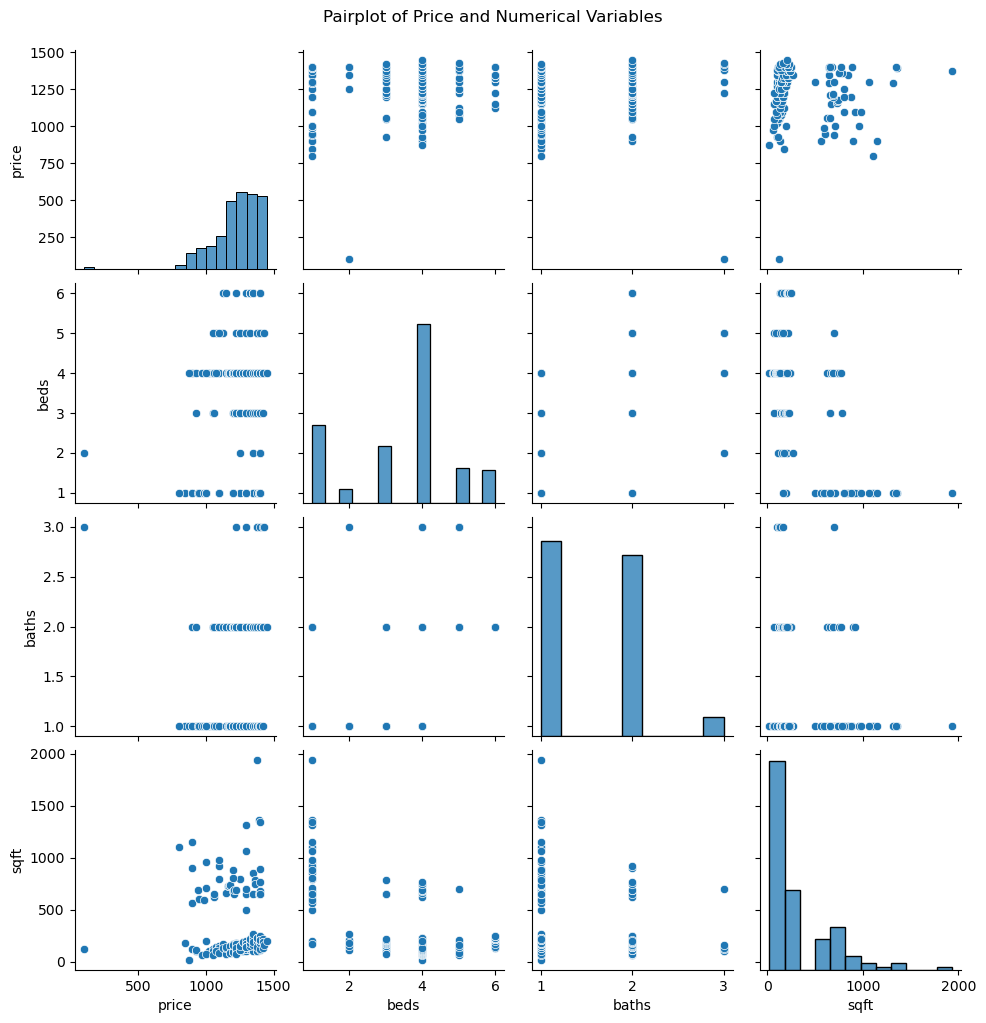

In [32]:
sns.pairplot(df[['price', 'beds', 'baths', 'sqft']])
plt.suptitle('Pairplot of Price and Numerical Variables', y=1.02)
plt.show()

C:\Users\Shubh\anaconda3\Lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


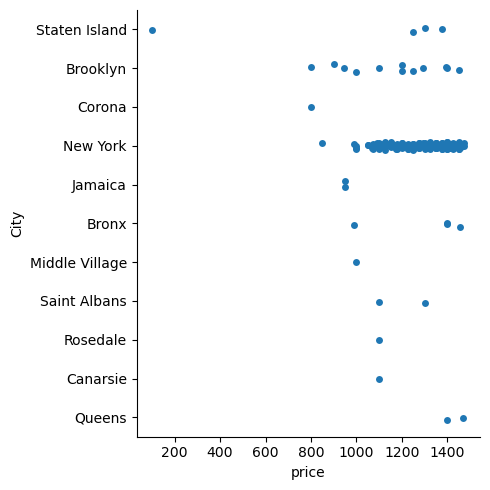

In [7]:
sns.catplot(data=df,y='City',x='price',ax=20)

### New York is most densely populated along with a relatively high rent than other cities
### 2nd position is covered by Brooklyn, which is intuitive as they are metropolitans 

<Axes: xlabel='sqft', ylabel='price'>

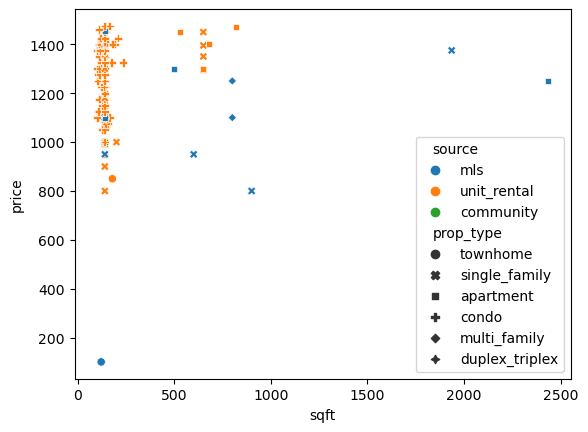

In [9]:
markers = {"mls": "/", "unit_rental":'x' ,"community":'+'}
sns.scatterplot(data=df, x="sqft", y="price", hue="source", style ='prop_type')

### From the graph above, we can realize that 'unit_rental' is highly densed in it's reach for consumer exposure
### We also realize that most properties are condos but fall under 0-500 sqft
### However apartments for multi/single-family consumers are notable by 'mls'

## Based on the provided DataFrame, we can calculate and visualize the following KPIs:

- Average Price by Property Type
- Average Price by City
- Price Distribution
- Price-to-Square-Footage Ratio

In [34]:
sns.set(style="whitegrid")
avg_price_by_prop_type = df.groupby('prop_type')['price'].mean().reset_index()
avg_price_by_prop_type

,prop_type,price
0,apartment,1218.076923
1,condo,1263.474576
2,duplex_triplex,1200.000000
3,multi_family,1175.000000
4,single_family,1178.906250
5,townhome,475.500000


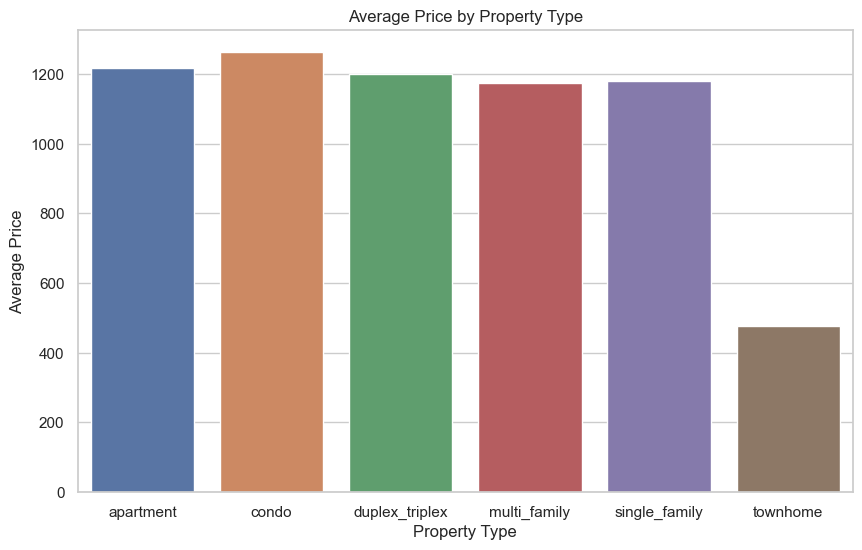

In [35]:
# Bar plot of Average Price by Property Type
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_prop_type, x='prop_type', y='price')
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.show()

In [37]:
# Calculate Average Price by City
avg_price_by_city = df.groupby('city')['price'].mean().reset_index()
avg_price_by_city

,city,price
0,Bronx,1160.000000
1,Brooklyn,1157.083333
2,Corona,900.000000
3,Jamaica,950.000000
4,Middle Village,1000.000000
5,New York,1256.382979
6,Queens,1400.000000
7,Rosedale,1100.000000
8,Saint Albans,1200.000000
9,Staten Island,925.333333


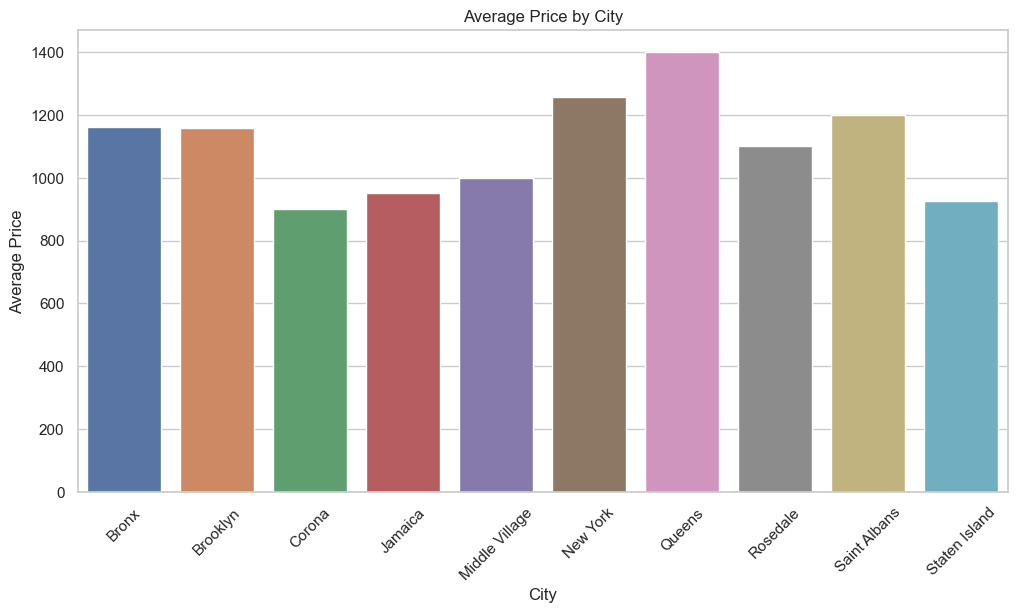

In [38]:
# Bar plot of Average Price by City
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_city, x='city', y='price')
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

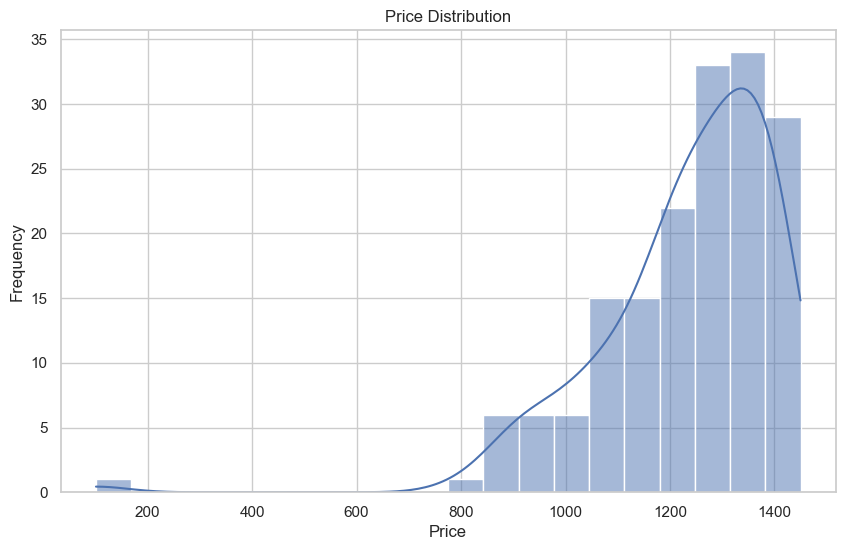

In [42]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

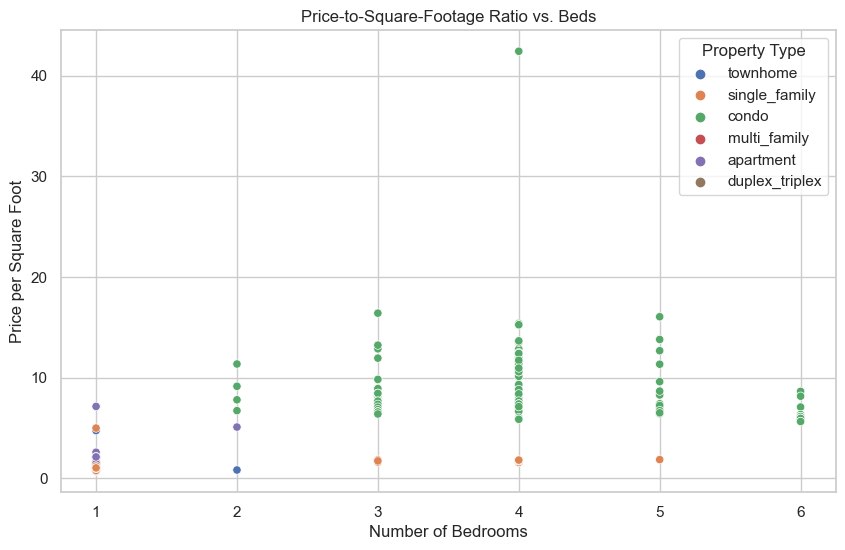

In [43]:
df['price_per_sqft'] = df['price'] / df['sqft']

# Scatter plot of Price-to-Square-Footage Ratio vs. Beds
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='beds', y='price_per_sqft', hue='prop_type')
plt.title('Price-to-Square-Footage Ratio vs. Beds')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price per Square Foot')
plt.legend(title='Property Type')
plt.show()

In [10]:
pd.pivot_table(df,values='price',columns='prop_type')

prop_type,apartment,condo,duplex_triplex,multi_family,single_family,townhome
price,1263.125,1288.96,1200.0,1175.0,1160.535714,475.5


In [11]:
df['prop_type'].value_counts()

condo             125
single_family      28
apartment          16
townhome            2
multi_family        2
duplex_triplex      1
Name: prop_type, dtype: int64

In [13]:
df[(df['prop_type']=='condo')].sum()['price']

161120

In [14]:
df[(df['prop_type']=='condo') & (df['City']=='New York')]

,Unnamed: 0,prop_type,price_raw,price,beds,baths,sqft,rank,source,City
13,18,condo,1000,1000,4,1,140.0,27,unit_rental,New York
14,19,condo,1000,1000,4,1,140.0,28,unit_rental,New York
15,20,condo,1050,1050,4,1,126.0,29,unit_rental,New York
16,21,condo,1050,1050,4,1,140.0,30,unit_rental,New York
18,23,condo,1075,1075,5,2,155.0,32,unit_rental,New York
...,...,...,...,...,...,...,...,...,...,...
167,184,condo,1450,1450,4,1,140.0,21,unit_rental,New York
168,185,condo,1450,1450,3,1,140.0,22,unit_rental,New York
170,187,condo,1460,1460,4,1,110.0,24,unit_rental,New York
172,190,condo,1475,1475,4,2,140.0,27,unit_rental,New York


In [20]:
pd.pivot_table(df,values='price',index='City',aggfunc=np.sum).sort_values(by='price',ascending=False)

,price
City,
New York,183950
Brooklyn,13935
Bronx,5245
Staten Island,4026
Queens,2870
Saint Albans,2400
Jamaica,1900
Canarsie,1100
Rosedale,1100


<Axes: ylabel='[Queens, Bronx, New York, Saint Albans, Brooklyn, Canarsie, Rosedale, Staten Island, Middle Village, Jamaica, Corona]'>

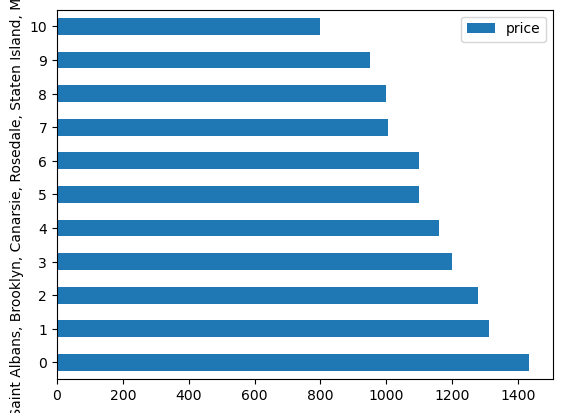

In [43]:
pvt = pd.pivot_table(df,values='price',index='City',aggfunc=np.mean).sort_values(by='price',ascending=False).reset_index()
pvt.plot(kind='barh',ylabel=pvt['City'],yticks=pvt['City'].index)

In [15]:
pd.pivot_table(df,values='price',columns='prop_type',index=['City'],aggfunc=np.sum)

prop_type,apartment,condo,duplex_triplex,multi_family,single_family,townhome
City,,,,,,
Bronx,5245.0,NaN,NaN,NaN,NaN,NaN
Brooklyn,4595.0,NaN,1200.0,2350.0,5790.0,NaN
Canarsie,1100.0,NaN,NaN,NaN,NaN,NaN
Corona,NaN,NaN,NaN,NaN,800.0,NaN
Jamaica,NaN,NaN,NaN,NaN,1900.0,NaN
Middle Village,NaN,NaN,NaN,NaN,1000.0,NaN
New York,3850.0,161120.0,NaN,NaN,18130.0,850.0
Queens,2870.0,NaN,NaN,NaN,NaN,NaN
Rosedale,NaN,NaN,NaN,NaN,1100.0,NaN


#### All condos belong in New York

In [90]:
pd.pivot_table(df,values='price',columns='prop_type',index=['City','source'],aggfunc=np.mean)

prop_type                   apartment        condo  duplex_triplex  \
City           source                                                
Bronx          community       990.00          NaN             NaN   
               mls            1455.00          NaN             NaN   
               unit_rental    1300.00          NaN             NaN   
Brooklyn       community      1000.00          NaN             NaN   
               mls                NaN          NaN             NaN   
               unit_rental    1246.25          NaN          1200.0   
Canarsie       mls            1100.00          NaN             NaN   
Jamaica        mls                NaN          NaN             NaN   
Middle Village unit_rental        NaN          NaN             NaN   
New York       community      1275.00          NaN             NaN   
               unit_rental    1300.00  1305.271318             NaN   
Queens         unit_rental    1435.00          NaN             NaN   
Rosedale       mls                NaN          NaN             NaN   
Saint Albans   mls                NaN          NaN             NaN   
Staten Island  mls            1275.00          NaN             NaN   

prop_type                   multi_family  single_family  townhome  
City           source                                              
Bronx          community             NaN            NaN       NaN  
               mls                   NaN            NaN       NaN  
               unit_rental           NaN            NaN       NaN  
Brooklyn       community             NaN            NaN       NaN  
               mls                1175.0    1400.000000       NaN  
               unit_rental           NaN     998.333333       NaN  
Canarsie       mls                   NaN            NaN       NaN  
Jamaica        mls                   NaN     950.000000       NaN  
Middle Village unit_rental           NaN    1000.000000       NaN  
New York       community             NaN            NaN       NaN  
               unit_rental           NaN    1210.384615     850.0  
Queens         unit_rental           NaN            NaN       NaN  
Rosedale       mls                   NaN    1100.000000       NaN  
Saint Albans   mls                   NaN    1200.000000       NaN  
Staten Island  mls                   NaN    1375.000000     101.0

In [45]:
df

,prop_type,prop_status,price,beds,baths,sqft,rank,source,City,Country,State
0,townhome,for_rent,101,2,3,121.0,9,mls,Staten Island,USA,New York
1,single_family,for_rent,800,1,1,140.0,11,unit_rental,Brooklyn,USA,New York
2,townhome,for_rent,850,1,1,179.0,13,unit_rental,New York,USA,New York
3,single_family,for_rent,900,1,1,140.0,14,unit_rental,Brooklyn,USA,New York
4,apartment,for_rent,945,1,1,140.0,15,unit_rental,Brooklyn,USA,New York
...,...,...,...,...,...,...,...,...,...,...,...
169,condo,for_rent,1475,4,2,140.0,24,unit_rental,New York,USA,New York
170,condo,for_rent,1475,4,2,140.0,25,unit_rental,New York,USA,New York
171,condo,for_rent,1475,3,1,140.0,26,unit_rental,New York,USA,New York
172,condo,for_rent,1475,4,2,140.0,27,unit_rental,New York,USA,New York
